## 1. Data Loading and Preprocessing

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.preprocessing import image
from keras.layers import Dense, InputLayer, Conv2D, MaxPool2D, Flatten
    
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [2]:
# To stop potential randomness
seed = 42
rng = np.random.RandomState(seed)

In [3]:
data = pd.read_csv('../datasets/emergency_classification/emergency_classification.csv')

In [4]:
# load images and store it in numpy array
X = []
for img_name in data.image_names:
    img = plt.imread('../datasets/emergency_classification/images/' + img_name)
    X.append(img)
    
X=np.array(X)

# create target
y = data.emergency_or_not.values

In [5]:
X.shape

(2352, 224, 224, 3)

In [6]:
X = X / X.max()

In [7]:
X_train, X_valid, Y_train, Y_valid=train_test_split(X,y,test_size=0.3, random_state=42)

## 3. Model Building

In [8]:
model = Sequential()
    
model.add(InputLayer(input_shape=(224, 224, 3)))

model.add(Conv2D(25, (5, 5), activation='relu', strides=(1, 1), padding='valid'))
model.add(Conv2D(50, (5, 5), activation='relu', strides=(1, 1), padding='valid'))

model.add(Flatten())

model.add(Dense(units=100, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

In [9]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 220, 220, 25)      1900      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 216, 216, 50)      31300     
_________________________________________________________________
flatten_1 (Flatten)          (None, 2332800)           0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               233280100 
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 101       
Total params: 233,313,401
Trainable params: 233,313,401
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['accuracy'])

In [11]:
model.fit(X_train, Y_train, epochs=10, validation_data=(X_valid,Y_valid))

Train on 1646 samples, validate on 706 samples
Epoch 1/10
1646/1646 [==============================] - 14s 9ms/step - loss: 0.6711 - acc: 0.6142 - val_loss: 0.6067 - val_acc: 0.6898
Epoch 2/10
1646/1646 [==============================] - 10s 6ms/step - loss: 0.5969 - acc: 0.6865 - val_loss: 0.6905 - val_acc: 0.5779
Epoch 3/10
1646/1646 [==============================] - 10s 6ms/step - loss: 0.5512 - acc: 0.7254 - val_loss: 0.6070 - val_acc: 0.6827
Epoch 4/10
1646/1646 [==============================] - 10s 6ms/step - loss: 0.5248 - acc: 0.7400 - val_loss: 0.5340 - val_acc: 0.7394
Epoch 5/10
1646/1646 [==============================] - 10s 6ms/step - loss: 0.4897 - acc: 0.7679 - val_loss: 0.5229 - val_acc: 0.7380
Epoch 6/10
1646/1646 [==============================] - 10s 6ms/step - loss: 0.4528 - acc: 0.8001 - val_loss: 0.5076 - val_acc: 0.7578
Epoch 7/10
1646/1646 [==============================] - 10s 6ms/step - loss: 0.4194 - acc: 0.8196 - val_loss: 0.5093 - val_acc: 0.7691
Epoch 8/

In [12]:
model = Sequential()
    
model.add(InputLayer(input_shape=(224, 224, 3)))

model.add(Conv2D(25, (5, 5), activation='relu', strides=(1, 1), padding='valid'))
model.add(Conv2D(50, (5, 5), activation='relu', strides=(1, 1), padding='valid'))
model.add(MaxPool2D(pool_size=(4, 4), padding='valid'))
model.add(Flatten())

model.add(Dense(units=100, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['accuracy'])

In [13]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 220, 220, 25)      1900      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 216, 216, 50)      31300     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 50)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 145800)            0         
_________________________________________________________________
dense_3 (Dense)              (None, 100)               14580100  
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 101       
Total params: 14,613,401
Trainable params: 14,613,401
Non-trainable params: 0
________________________________________________________________

In [14]:
model.fit(X_train, Y_train, epochs=10,validation_data=(X_valid,Y_valid))

Train on 1646 samples, validate on 706 samples
Epoch 1/10
1646/1646 [==============================] - 8s 5ms/step - loss: 0.6644 - acc: 0.6015 - val_loss: 0.6553 - val_acc: 0.6204
Epoch 2/10
1646/1646 [==============================] - 7s 4ms/step - loss: 0.6302 - acc: 0.6488 - val_loss: 0.6546 - val_acc: 0.5935
Epoch 3/10
1646/1646 [==============================] - 7s 4ms/step - loss: 0.6105 - acc: 0.6756 - val_loss: 0.6353 - val_acc: 0.6161
Epoch 4/10
1646/1646 [==============================] - 7s 4ms/step - loss: 0.5801 - acc: 0.7035 - val_loss: 0.5818 - val_acc: 0.7054
Epoch 5/10
1646/1646 [==============================] - 7s 4ms/step - loss: 0.5572 - acc: 0.7254 - val_loss: 0.5504 - val_acc: 0.7365
Epoch 6/10
1646/1646 [==============================] - 7s 4ms/step - loss: 0.5272 - acc: 0.7448 - val_loss: 0.6162 - val_acc: 0.6601
Epoch 7/10
1646/1646 [==============================] - 7s 4ms/step - loss: 0.5256 - acc: 0.7503 - val_loss: 0.5572 - val_acc: 0.7025
Epoch 8/10
1646

There is 33 % chance that it is an emergency vehicle
Whereas actual class is  0


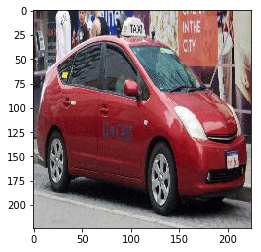

In [15]:
# get predictions
predictions = model.predict_classes(X_valid)[:, 0]
prediction_probabilities = model.predict(X_valid)[:, 0]

# pull out the original images from the data
# which correspond to the validation data
_, valid_vehicles, _, valid_y = train_test_split(data.image_names.values, y, test_size=0.3, random_state=seed)

# get a random index to plot image randomly
index = rng.choice(range(len(valid_vehicles)))

# get the corresponding image name and probability
img_name = valid_vehicles[index]
prob = (prediction_probabilities * 100).astype(int)[index]

# read the image
img = plt.imread('../datasets/emergency_classification/images/' + img_name)

# print probability and actual class
print('There is', prob , '% chance that it is an emergency vehicle')
print('Whereas actual class is ', valid_y[index])

# plot image
plt.imshow(img)

58 % sure that it is emergency
Whereas actual class is  0


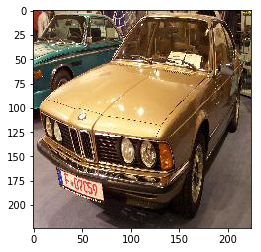

In [16]:
incorrect_indices = np.where(predictions != valid_y)[0]

index = rng.choice(incorrect_indices)
img_name = valid_vehicles[index]


prob = (prediction_probabilities * 100).astype(int)[index]

img = plt.imread('../datasets/emergency_classification/images/' + img_name)

print(prob , '% sure that it is emergency')
print('Whereas actual class is ', valid_y[index])

plt.imshow(img)

## 4. Hyperparameter Tuning

In [17]:
# change activation function of hidden layer
# increase hidden neurons
# increase hidden layers
# increase number of epochs
# change optimizer

# increase number of convolutional layers
# increase number of pooling layers
# increase number of convolutional filters
# change size of conv
# change size of pooling
# change padding technique
# change stride

In [18]:
# increase number of convolutional and pooling layers

model = Sequential()
    
model.add(InputLayer(input_shape=(224, 224, 3)))

model.add(Conv2D(25, (5, 5), activation='relu', strides=(1, 1), padding='valid'))
model.add(Conv2D(50, (5, 5), activation='relu', strides=(1, 1), padding='valid'))
model.add(MaxPool2D(pool_size=(4, 4), padding='valid'))

model.add(Conv2D(100, (5, 5), activation='relu', strides=(1, 1), padding='valid'))
model.add(MaxPool2D(pool_size=(4, 4), padding='valid'))

model.add(Flatten())

model.add(Dense(units=100, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['accuracy'])

In [19]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 220, 220, 25)      1900      
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 216, 216, 50)      31300     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 54, 54, 50)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 50, 50, 100)       125100    
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 100)       0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 14400)             0         
_________________________________________________________________
dense_5 (Dense)              (None, 100)               1440100   
__________

In [20]:
model.fit(X_train, Y_train, epochs=10,validation_data=(X_valid,Y_valid))

Train on 1646 samples, validate on 706 samples
Epoch 1/10
1646/1646 [==============================] - 8s 5ms/step - loss: 0.6864 - acc: 0.5541 - val_loss: 0.6840 - val_acc: 0.5609
Epoch 2/10
1646/1646 [==============================] - 7s 4ms/step - loss: 0.6754 - acc: 0.5863 - val_loss: 0.6802 - val_acc: 0.5609
Epoch 3/10
1646/1646 [==============================] - 7s 5ms/step - loss: 0.6711 - acc: 0.5863 - val_loss: 0.6826 - val_acc: 0.5609
Epoch 4/10
1646/1646 [==============================] - 7s 4ms/step - loss: 0.6680 - acc: 0.5863 - val_loss: 0.6752 - val_acc: 0.5609
Epoch 5/10
1646/1646 [==============================] - 8s 5ms/step - loss: 0.6623 - acc: 0.5863 - val_loss: 0.6692 - val_acc: 0.5609
Epoch 6/10
1646/1646 [==============================] - 7s 5ms/step - loss: 0.6548 - acc: 0.5911 - val_loss: 0.6603 - val_acc: 0.5609
Epoch 7/10
1646/1646 [==============================] - 7s 5ms/step - loss: 0.6418 - acc: 0.6258 - val_loss: 0.6403 - val_acc: 0.5949
Epoch 8/10
1646

In [21]:
# increase number of convolutional filters

model = Sequential()
    
model.add(InputLayer(input_shape=(224, 224, 3)))

model.add(Conv2D(125, (5, 5), activation='relu', strides=(1, 1), padding='valid'))
model.add(Conv2D(150, (5, 5), activation='relu', strides=(1, 1), padding='valid'))
model.add(MaxPool2D(pool_size=(4, 4), padding='valid'))

model.add(Conv2D(200, (5, 5), activation='relu', strides=(1, 1), padding='valid'))
model.add(MaxPool2D(pool_size=(4, 4), padding='valid'))

model.add(Flatten())

model.add(Dense(units=100, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['accuracy'])

In [22]:
model.fit(X_train, Y_train, epochs=10,validation_data=(X_valid,Y_valid))

Train on 1646 samples, validate on 706 samples
Epoch 1/10
1646/1646 [==============================] - 23s 14ms/step - loss: 0.6797 - acc: 0.5863 - val_loss: 0.6829 - val_acc: 0.5609
Epoch 2/10
1646/1646 [==============================] - 19s 11ms/step - loss: 0.6754 - acc: 0.5863 - val_loss: 0.6801 - val_acc: 0.5609
Epoch 3/10
1646/1646 [==============================] - 19s 11ms/step - loss: 0.6719 - acc: 0.5863 - val_loss: 0.6783 - val_acc: 0.5609
Epoch 4/10
1646/1646 [==============================] - 19s 11ms/step - loss: 0.6679 - acc: 0.5863 - val_loss: 0.6751 - val_acc: 0.5609
Epoch 5/10
1646/1646 [==============================] - 19s 11ms/step - loss: 0.6610 - acc: 0.5966 - val_loss: 0.6625 - val_acc: 0.5609
Epoch 6/10
1646/1646 [==============================] - 19s 11ms/step - loss: 0.6525 - acc: 0.6039 - val_loss: 0.6497 - val_acc: 0.6941
Epoch 7/10
1646/1646 [==============================] - 19s 11ms/step - loss: 0.6402 - acc: 0.6385 - val_loss: 0.6388 - val_acc: 0.6034
E

In [23]:
# change filter size for convolutional layer and pooling size for pooling layer

from keras.layers import GlobalMaxPool2D

model = Sequential()
    
model.add(InputLayer(input_shape=(224, 224, 3)))

model.add(Conv2D(125, (5, 5), activation='relu', strides=(1, 1), padding='valid'))
model.add(Conv2D(150, (5, 5), activation='relu', strides=(1, 1), padding='valid'))
model.add(MaxPool2D(pool_size=(8, 8), padding='valid'))

model.add(Conv2D(200, (3, 3), activation='relu', strides=(1, 1), padding='valid'))
model.add(Conv2D(225, (3, 3), activation='relu', strides=(1, 1), padding='valid'))

model.add(GlobalMaxPool2D())

model.add(Dense(units=100, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['accuracy'])

In [24]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 220, 220, 125)     9500      
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 216, 216, 150)     468900    
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 27, 27, 150)       0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 25, 25, 200)       270200    
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 23, 23, 225)       405225    
_________________________________________________________________
global_max_pooling2d_1 (Glob (None, 225)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 100)               22600     
__________

In [25]:
model.fit(X_train, Y_train, epochs=10,validation_data=(X_valid,Y_valid))

Train on 1646 samples, validate on 706 samples
Epoch 1/10
1646/1646 [==============================] - 19s 12ms/step - loss: 0.7267 - acc: 0.5012 - val_loss: 0.6860 - val_acc: 0.5609
Epoch 2/10
1646/1646 [==============================] - 18s 11ms/step - loss: 0.6785 - acc: 0.5863 - val_loss: 0.6893 - val_acc: 0.5609
Epoch 3/10
1646/1646 [==============================] - 18s 11ms/step - loss: 0.6793 - acc: 0.5863 - val_loss: 0.6894 - val_acc: 0.5609
Epoch 4/10
1646/1646 [==============================] - 18s 11ms/step - loss: 0.6787 - acc: 0.5863 - val_loss: 0.6870 - val_acc: 0.5609
Epoch 5/10
1646/1646 [==============================] - 18s 11ms/step - loss: 0.6782 - acc: 0.5863 - val_loss: 0.6875 - val_acc: 0.5609
Epoch 6/10
1646/1646 [==============================] - 18s 11ms/step - loss: 0.6777 - acc: 0.5863 - val_loss: 0.6854 - val_acc: 0.5609
Epoch 7/10
1646/1646 [==============================] - 18s 11ms/step - loss: 0.6780 - acc: 0.5863 - val_loss: 0.6870 - val_acc: 0.5609
E

In [26]:
# change padding technique

model = Sequential()
    
model.add(InputLayer(input_shape=(224, 224, 3)))

model.add(Conv2D(125, (5, 5), activation='relu', strides=(1, 1), padding='same'))
model.add(Conv2D(150, (5, 5), activation='relu', strides=(1, 1), padding='same'))
model.add(MaxPool2D(pool_size=(8, 8), padding='valid'))

model.add(Conv2D(200, (3, 3), activation='relu', strides=(1, 1), padding='same'))
model.add(Conv2D(225, (3, 3), activation='relu', strides=(1, 1), padding='same'))

model.add(GlobalMaxPool2D())

model.add(Dense(units=100, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer="adam", metrics=['accuracy'])

In [27]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 224, 224, 125)     9500      
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 224, 224, 150)     468900    
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 28, 28, 150)       0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 28, 28, 200)       270200    
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 28, 28, 225)       405225    
_________________________________________________________________
global_max_pooling2d_2 (Glob (None, 225)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 100)               22600     
__________

In [28]:
model.fit(X_train, Y_train, epochs=10,validation_data=(X_valid,Y_valid))

Train on 1646 samples, validate on 706 samples
Epoch 1/10
1646/1646 [==============================] - 23s 14ms/step - loss: 0.7030 - acc: 0.5668 - val_loss: 0.6908 - val_acc: 0.5609
Epoch 2/10
1646/1646 [==============================] - 19s 12ms/step - loss: 0.6365 - acc: 0.6258 - val_loss: 0.5366 - val_acc: 0.7465
Epoch 3/10
1646/1646 [==============================] - 19s 12ms/step - loss: 0.5562 - acc: 0.7309 - val_loss: 0.5305 - val_acc: 0.7564
Epoch 4/10
1646/1646 [==============================] - 19s 12ms/step - loss: 0.4877 - acc: 0.7734 - val_loss: 0.4624 - val_acc: 0.7776
Epoch 5/10
1646/1646 [==============================] - 19s 12ms/step - loss: 0.4608 - acc: 0.7868 - val_loss: 0.4836 - val_acc: 0.7705
Epoch 6/10
1646/1646 [==============================] - 19s 12ms/step - loss: 0.4430 - acc: 0.7965 - val_loss: 0.4863 - val_acc: 0.7847
Epoch 7/10
1646/1646 [==============================] - 19s 12ms/step - loss: 0.3712 - acc: 0.8317 - val_loss: 0.4146 - val_acc: 0.8059
E

In [29]:
# change stride

model = Sequential()
    
model.add(InputLayer(input_shape=(224, 224, 3)))

model.add(Conv2D(125, (5, 5), activation='relu', strides=(2, 2), padding='same'))
model.add(Conv2D(150, (5, 5), activation='relu', strides=(2, 2), padding='same'))
model.add(MaxPool2D(pool_size=(8, 8), padding='valid'))

model.add(Conv2D(200, (3, 3), activation='relu', strides=(2, 2), padding='same'))
model.add(Conv2D(225, (3, 3), activation='relu', strides=(2, 2), padding='same'))

model.add(GlobalMaxPool2D())

model.add(Dense(units=100, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer="adam", metrics=['accuracy'])

In [30]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 112, 112, 125)     9500      
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 56, 56, 150)       468900    
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 7, 7, 150)         0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 4, 4, 200)         270200    
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 2, 2, 225)         405225    
_________________________________________________________________
global_max_pooling2d_3 (Glob (None, 225)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 100)               22600     
__________

In [31]:
model.fit(X_train, Y_train, epochs=15,validation_data=(X_valid,Y_valid))

Train on 1646 samples, validate on 706 samples
Epoch 1/15
1646/1646 [==============================] - 8s 5ms/step - loss: 0.6325 - acc: 0.6695 - val_loss: 0.5367 - val_acc: 0.7408
Epoch 2/15
1646/1646 [==============================] - 7s 4ms/step - loss: 0.5069 - acc: 0.7473 - val_loss: 0.4722 - val_acc: 0.7705
Epoch 3/15
1646/1646 [==============================] - 7s 4ms/step - loss: 0.4628 - acc: 0.7795 - val_loss: 0.4551 - val_acc: 0.7989
Epoch 4/15
1646/1646 [==============================] - 7s 4ms/step - loss: 0.4275 - acc: 0.8056 - val_loss: 0.4366 - val_acc: 0.7932
Epoch 5/15
1646/1646 [==============================] - 7s 4ms/step - loss: 0.3602 - acc: 0.8420 - val_loss: 0.4101 - val_acc: 0.8159
Epoch 6/15
1646/1646 [==============================] - 7s 4ms/step - loss: 0.3212 - acc: 0.8548 - val_loss: 0.3943 - val_acc: 0.8187
Epoch 7/15
1646/1646 [==============================] - 7s 4ms/step - loss: 0.2634 - acc: 0.8937 - val_loss: 0.4201 - val_acc: 0.8102
Epoch 8/15
1646

![original](images/original_vgg_model.png)

In [32]:
# VGG equivalent

model = Sequential()
model.add(InputLayer(input_shape=(224,224,3)))
model.add(Conv2D(filters = 64, kernel_size = (3,3), activation='relu', padding='same'))
model.add(Conv2D(filters = 64, kernel_size = (3,3), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 128, kernel_size = (3,3), activation='relu', padding='same'))
model.add(Conv2D(filters = 128, kernel_size = (3,3), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 256, kernel_size = (3,3), activation='relu', padding='same'))
model.add(Conv2D(filters = 256, kernel_size = (3,3), activation='relu', padding='same'))
model.add(Conv2D(filters = 256, kernel_size = (3,3), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 256, kernel_size = (3,3), activation='relu', padding='same'))
model.add(Conv2D(filters = 256, kernel_size = (3,3), activation='relu', padding='same'))
model.add(Conv2D(filters = 256, kernel_size = (3,3), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 512, kernel_size = (3,3), activation='relu', padding='same'))
model.add(Conv2D(filters = 512, kernel_size = (3,3), activation='relu', padding='same'))
model.add(Conv2D(filters = 512, kernel_size = (3,3), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(units = 1024, activation ='sigmoid'))
model.add(Dense(units=1, activation = 'sigmoid'))


model.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['accuracy'])

In [33]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_23 (Conv2D)           (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 56, 56, 128)       0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 56, 56, 256)       295168    
__________

In [34]:
model.fit(X_train, Y_train, epochs=200,validation_data=(X_valid,Y_valid))

Train on 1646 samples, validate on 706 samples
Epoch 1/200
1646/1646 [==============================] - 19s 12ms/step - loss: 0.6812 - acc: 0.5765 - val_loss: 0.6880 - val_acc: 0.5609
Epoch 2/200
1646/1646 [==============================] - 16s 10ms/step - loss: 0.6874 - acc: 0.5741 - val_loss: 0.6891 - val_acc: 0.5609
Epoch 3/200
1646/1646 [==============================] - 16s 10ms/step - loss: 0.6859 - acc: 0.5729 - val_loss: 0.6975 - val_acc: 0.4391
Epoch 4/200
1646/1646 [==============================] - 16s 10ms/step - loss: 0.6846 - acc: 0.5668 - val_loss: 0.6883 - val_acc: 0.5609
Epoch 5/200
1646/1646 [==============================] - 16s 10ms/step - loss: 0.6834 - acc: 0.5802 - val_loss: 0.7036 - val_acc: 0.4391
Epoch 6/200
1646/1646 [==============================] - 16s 10ms/step - loss: 0.6852 - acc: 0.5863 - val_loss: 0.6857 - val_acc: 0.5609
Epoch 7/200
1646/1646 [==============================] - 16s 10ms/step - loss: 0.6848 - acc: 0.5680 - val_loss: 0.6993 - val_acc: 0

1646/1646 [==============================] - 16s 10ms/step - loss: 0.6814 - acc: 0.5863 - val_loss: 0.6868 - val_acc: 0.5609
Epoch 61/200
1646/1646 [==============================] - 16s 10ms/step - loss: 0.6851 - acc: 0.5753 - val_loss: 0.6847 - val_acc: 0.5609
Epoch 62/200
1646/1646 [==============================] - 16s 10ms/step - loss: 0.6848 - acc: 0.5778 - val_loss: 0.6861 - val_acc: 0.5609
Epoch 63/200
1646/1646 [==============================] - 16s 10ms/step - loss: 0.6818 - acc: 0.5699 - val_loss: 0.6876 - val_acc: 0.5609
Epoch 64/200
1646/1646 [==============================] - 16s 10ms/step - loss: 0.6855 - acc: 0.5705 - val_loss: 0.6920 - val_acc: 0.6431
Epoch 65/200
1646/1646 [==============================] - 16s 10ms/step - loss: 0.6836 - acc: 0.5753 - val_loss: 0.6870 - val_acc: 0.5609
Epoch 66/200
1646/1646 [==============================] - 16s 10ms/step - loss: 0.6870 - acc: 0.5772 - val_loss: 0.7018 - val_acc: 0.5609
Epoch 67/200
1646/1646 [=======================

1646/1646 [==============================] - 16s 10ms/step - loss: 0.3859 - acc: 0.8202 - val_loss: 0.5945 - val_acc: 0.7082
Epoch 120/200
1646/1646 [==============================] - 16s 10ms/step - loss: 0.3802 - acc: 0.8232 - val_loss: 0.4515 - val_acc: 0.7904
Epoch 121/200
1646/1646 [==============================] - 16s 10ms/step - loss: 0.3832 - acc: 0.8256 - val_loss: 0.4233 - val_acc: 0.8059
Epoch 122/200
1646/1646 [==============================] - 16s 10ms/step - loss: 0.3692 - acc: 0.8366 - val_loss: 0.5188 - val_acc: 0.7266
Epoch 123/200
1646/1646 [==============================] - 16s 10ms/step - loss: 0.3668 - acc: 0.8378 - val_loss: 0.4778 - val_acc: 0.7762
Epoch 124/200
1646/1646 [==============================] - 16s 10ms/step - loss: 0.3524 - acc: 0.8372 - val_loss: 0.4642 - val_acc: 0.8045
Epoch 125/200
1646/1646 [==============================] - 16s 10ms/step - loss: 0.3608 - acc: 0.8366 - val_loss: 0.4282 - val_acc: 0.8144
Epoch 126/200
1646/1646 [================

1646/1646 [==============================] - 16s 10ms/step - loss: 0.0048 - acc: 0.9957 - val_loss: 0.6114 - val_acc: 0.8414
Epoch 179/200
1646/1646 [==============================] - 16s 10ms/step - loss: 0.0048 - acc: 0.9951 - val_loss: 0.6121 - val_acc: 0.8414
Epoch 180/200
1646/1646 [==============================] - 16s 10ms/step - loss: 0.0047 - acc: 0.9970 - val_loss: 0.6146 - val_acc: 0.8442
Epoch 181/200
1646/1646 [==============================] - 16s 10ms/step - loss: 0.0047 - acc: 0.9964 - val_loss: 0.6160 - val_acc: 0.8428
Epoch 182/200
1646/1646 [==============================] - 16s 10ms/step - loss: 0.0047 - acc: 0.9970 - val_loss: 0.6194 - val_acc: 0.8414
Epoch 183/200
1646/1646 [==============================] - 16s 10ms/step - loss: 0.0046 - acc: 0.9970 - val_loss: 0.6165 - val_acc: 0.8456
Epoch 184/200
1646/1646 [==============================] - 16s 10ms/step - loss: 0.0046 - acc: 0.9970 - val_loss: 0.6217 - val_acc: 0.8414
Epoch 185/200
1646/1646 [================